# Driven Damped Pendulum (DDP)

$ \ddot{\phi} + 2 \beta \dot{\phi} + \omega_0^2 \sin \phi = \gamma \omega_0^2 \cos \omega t $

In [37]:
import numpy as np
import matplotlib.pyplot as plt

steps = 100
def logi(r,x0):
    x = np.zeros(steps + 1)
    x[0]=x0
    for i in range(steps):
        x[i+1] = r * x[i] * (1 - x[i])
    return x

In [3]:
x0=0.1
logi(1.5,x0)

array([0.1       , 0.135     , 0.1751625 , 0.2167209 , 0.25462943,
       0.28468992, 0.30546236, 0.31823266, 0.32544095, 0.32929371,
       0.33128904, 0.33230492, 0.33281754, 0.33307504, 0.33320409,
       0.33326868, 0.333301  , 0.33331717, 0.33332525, 0.33332929,
       0.33333131, 0.33333232, 0.33333283, 0.33333308, 0.33333321,
       0.33333327, 0.3333333 , 0.33333332, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.33333333])

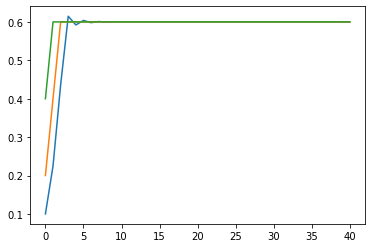

In [6]:
plt.plot(logi(2.5,0.1))
plt.plot(logi(2.5,0.2))
plt.plot(logi(2.5,0.4))

Text(0, 0.5, 'x(t)')

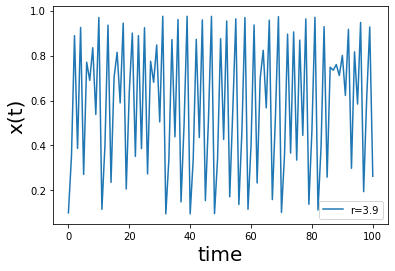

In [25]:
steps=100
x0=0.1
plt.plot(logi(3.9,x0),label='r=3.9')
plt.legend(loc='lower right')
plt.xlabel("time",fontsize="20")
plt.ylabel("x(t)",fontsize="20")

Text(0, 0.5, 'x(t)')

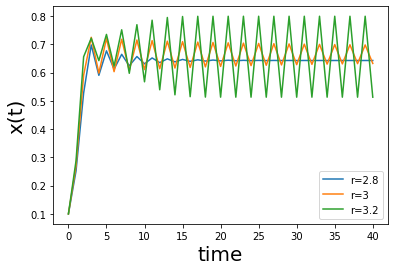

In [52]:
x0=0.1
plt.plot(logi(2.8,x0),label='r=2.8')
plt.plot(logi(3,x0),label='r=3')
plt.plot(logi(3.2,x0),label='r=3.2')
plt.legend(loc='lower right')
plt.xlabel("time",fontsize="20")
plt.ylabel("x(t)",fontsize="20")

Text(0, 0.5, 'x(t)')

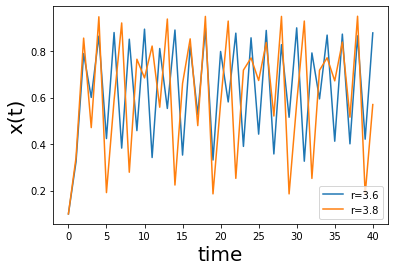

In [53]:
x0=0.1
plt.plot(logi(3.6,x0),label='r=3.6')
plt.plot(logi(3.8,x0),label='r=3.8')
plt.legend(loc='lower right')
plt.xlabel("time",fontsize="20")
plt.ylabel("x(t)",fontsize="20")

## Sensitive dependence on initial conditions

Text(0, 0.5, 'x(t)')

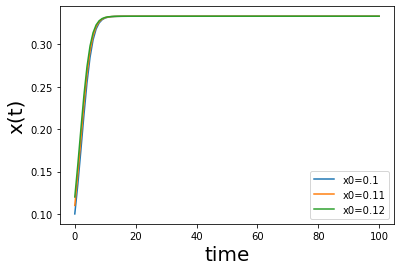

In [26]:
plt.plot(logi(1.5,0.1),label='x0=0.1')
plt.plot(logi(1.5,0.11),label='x0=0.11')
plt.plot(logi(1.5,0.12),label='x0=0.12')
plt.legend(loc='lower right')
plt.xlabel("time",fontsize="20")
plt.ylabel("x(t)",fontsize="20")

Text(0, 0.5, 'x(t)')

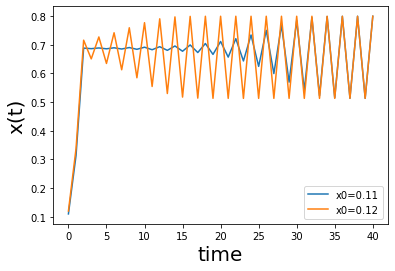

In [55]:
plt.plot(logi(3.2,0.11),label='x0=0.11')
plt.plot(logi(3.2,0.12),label='x0=0.12')
plt.legend(loc='lower right')
plt.xlabel("time",fontsize="20")
plt.ylabel("x(t)",fontsize="20")

Text(0, 0.5, 'x(t)')

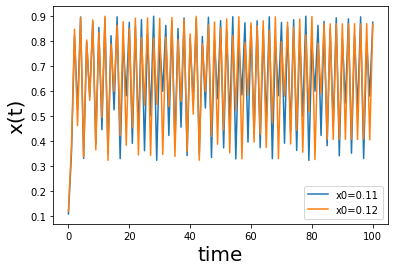

In [27]:
plt.plot(logi(3.6,0.11),label='x0=0.11')
plt.plot(logi(3.6,0.12),label='x0=0.12')
plt.legend(loc='lower right')
plt.xlabel("time",fontsize="20")
plt.ylabel("x(t)",fontsize="20")

Text(0, 0.5, 'x(t)')

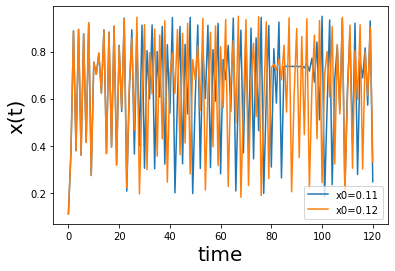

In [33]:
steps=120
plt.plot(logi(3.8,0.11),label='x0=0.11')
plt.plot(logi(3.8,0.1100001),label='x0=0.12')
plt.legend(loc='lower right')
plt.xlabel("time",fontsize="20")
plt.ylabel("x(t)",fontsize="20")

Text(0, 0.5, 'dx')

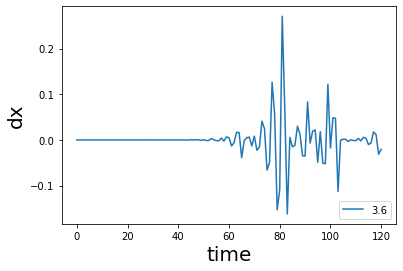

In [35]:
plt.plot(logi(3.6,0.11)-logi(3.6,0.1100001),label='3.6')
plt.legend(loc='lower right')
plt.xlabel("time",fontsize="20")
plt.ylabel("dx",fontsize="20")

## Bifurcation Diagram and Period Doubling

In [40]:
N=80
X = np.zeros((N,N))
Y = np.zeros((N,N))

r=np.linspace(0,4,N)
xi=np.linspace(0.01,1,N)

steps=40
for i in range(N):
    for j in range(N):
        r0, x0 = r[i], xi[j]
        for n in range(steps):
            ts=logi(r0,x0)
            
        Y[i][j]=ts[-1]
        X[i][j]=r0

Text(0, 0.5, 'x')

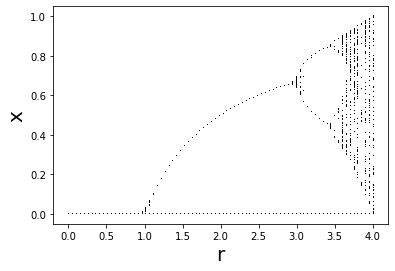

In [41]:
plt.plot(X,Y,',',c='black');
plt.xlabel("r",fontsize="20")
plt.ylabel("x",fontsize="20")

## Cobweb

In [92]:
lx=np.linspace(0,1,100)
ly=np.linspace(0,1,100)

def logy(r,x):
    return r* x * (1-x) 

Text(0, 0.5, 'f(x)')

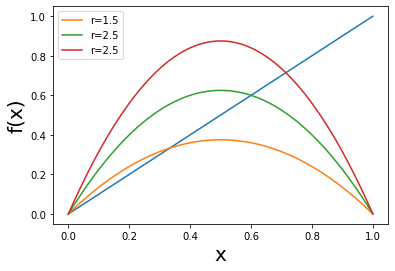

In [100]:
plt.plot(lx,ly,'-')
plt.plot(lx,logy(1.5,lx),label="r=1.5")
plt.plot(lx,logy(2.5,lx),label="r=2.5")
plt.plot(lx,logy(3.5,lx),label="r=2.5")
plt.legend(loc='upper left')
plt.xlabel("x",fontsize="20")
plt.ylabel("f(x)",fontsize="20")